<a href="https://colab.research.google.com/github/FernandoRodriguesDeSantana/ML_py/blob/main/third_ml_py.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Vídeo: https://www.youtube.com/watch?v=cGxv8tOaA7I&t=0s

# **Como criar uma rede neural**

In [72]:
import torch
import numpy as np
from torch import nn

In [73]:
#Inicializando uma rede neural com a biblioteca Module
#A biblioteca Module é a raiz de todas as redes neurais do Pytorch
#LineNetwork se refere a uma rede linear
class LineNetwork(nn.Module):
  def __init__(self):
    super().__init__()
    self.layers = nn.Sequential(
        nn.Linear(1,1)
        #Linear(1,1) significa que será uma rede com 1 camada de neurônios
        #Um neurônio representa uma função
    )

  def forward(self, x):
   return self.layers(x)

## **Infraestrutura de Dados**

In [74]:
from torch.utils.data import Dataset, DataLoader
import torch.distributions.uniform as urand #serve para aleatorizar números

In [75]:
#Construindo um dataset para servir como base de dados para o neurônio (a*x + b)
class AlgebraicDataset(Dataset):
  #função que irá construir um dataset recebendo os parâmetros abaixo:
  def __init__(self, f, interval, nsamples):
    #interval: intervalo de números
    #nsamples: quantidade de pontos a serem plotados
    X = urand.Uniform(interval[0], interval[1]).sample([nsamples])
    self.data = [(x, f(x)) for x in X]

  #função para saber quantos dados tem no dataset
  def __len__(self):
    return len(self.data)

  #função para buscar um determinado valor
  def __getitem__(self, index):
    return self.data[index]

In [76]:
line = lambda x: 2*x + 3
interval = (-10,10)
train_nsamples = 1000
test_nsamples = 100

In [77]:
train_dataset = AlgebraicDataset(line, interval, train_nsamples)
test_dataset = AlgebraicDataset(line, interval, test_nsamples)

train_dataloader = DataLoader(train_dataset, batch_size=train_nsamples, shuffle=True)
#serve para carregar dados provenientes do train_dataset com fluxo (batch_size) único
#o batch_size poderia ser menor, provendo "doses homeopáticas" de dados

test_dataloader = DataLoader(test_dataset, batch_size=test_nsamples, shuffle=True)
#shuffle serve para embaralhar os dados

## **Hiperparâmetros de Otimização**

In [78]:
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Rodando na {device}")

Rodando na cpu


In [79]:
model = LineNetwork().to(device)

In [80]:
lossfunc = nn.MSELoss()
#MSE significa Mean Squared Error
optimizer = torch.optim.SGD(model.parameters(), lr=1e-3) #lr é a taxa de aprendizado da rede neural
#SGD signfica Stochastic Gradient Descent

In [81]:
def train(model, dataloader, lossfunc, optimizer):
  model.train()
  cumloss = 0.0
  for X, y in dataloader:
    X = X.unsqueeze(1).float().to(device)
    y = y.unsqueeze(1).float().to(device)
    #unsqueeze serve para transformar os elementos de um vetor em tensores
    #.float() transforma a entrada y em float de 32 bits

    pred = model(X)
    loss = lossfunc(pred, y)

    optimizer.zero_grad()
    #o PyTorch acumula os valores de cada cálculo de gradiente. "zero_grad()" serve para zerar o gradiente para calcular um novo
    loss.backward()
    #.backward() calcula o gradiente
    optimizer.step()
    #.step serve para andar na sentido contrário do gradiente, ou seja, para onde há menor erro

    #loss é um tensor que obtem o float
    cumloss += loss.item()

  return cumloss / len(dataloader)

def test(model, dataloader, lossfunc):
  model.eval()
  cumloss = 0.0

  with torch.no_grad():
  #torch.no_grad serve para acumular gradientes
    for X, y in dataloader:
      X = X.unsqueeze(1).float().to(device)
      y = y.unsqueeze(1).float().to(device)
      #unsqueeze serve para transformar os elementos de um vetor em tensores
      #.float() transforma a entrada y em float de 32 bits

      pred = model(X)
      loss = lossfunc(pred, y)

      #loss é um tensor que obtem o float
      cumloss += loss.item()

  return cumloss / len(dataloader)

##**Treinando a rede**

In [82]:
def plot_comparinson(f, model, interval=(-10, 10), nsamples=10):
  fig, ax = plt.subplots(figsize=(10, 10))

  ax.grid(True, which='both')
  ax.spines['left'].set_position('zero')
  ax.spines['right'].set_color('none')
  ax.spines['bottom'].set_position('zero')
  ax.spines['top'].set_color('none')

  samples = np.linspace(interval[0], interval[1], nsamples)
  model.eval()
  with torch.no_grad():
    pred = model(torch.tensor(samples).unsqueeze(1).float().to(device))

  ax.plot(samples, list(map(f, samples)), "o", label="ground truth")
  ax.plot(samples, pred.cpu(), label="model")
  plt.legend()
  plt.show()

In [83]:
import matplotlib.pyplot as plt

Epoch: 0; Train Loss: 3.022629499435425


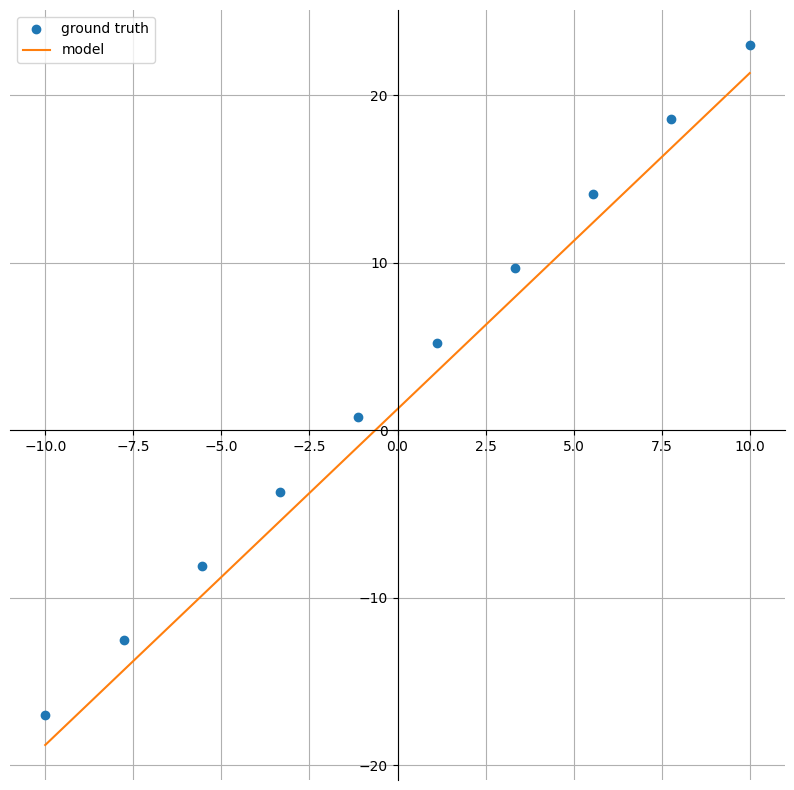

Epoch: 10; Train Loss: 2.9040420055389404


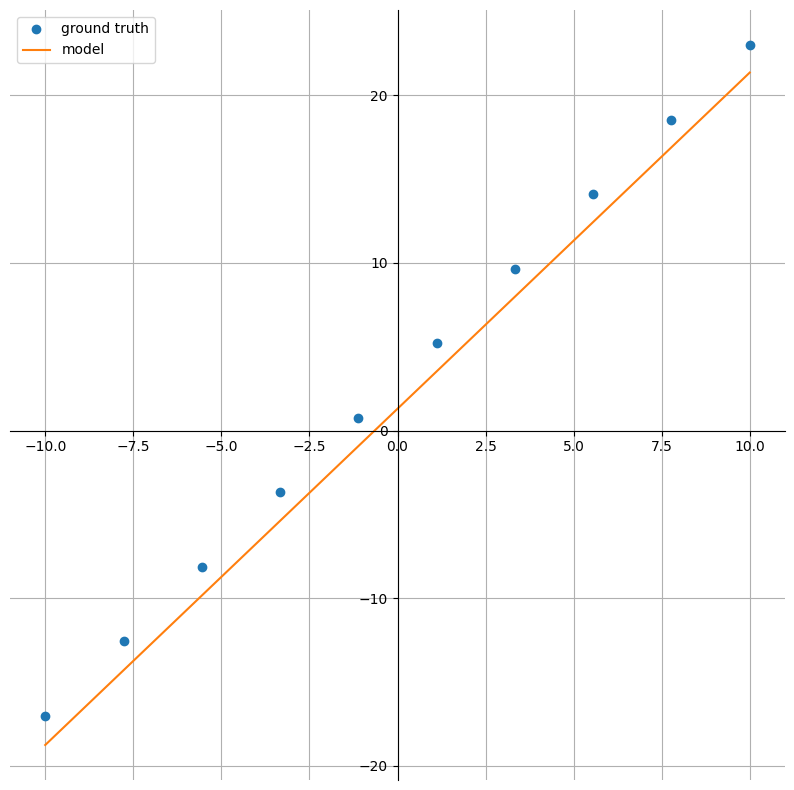

Epoch: 20; Train Loss: 2.790104866027832


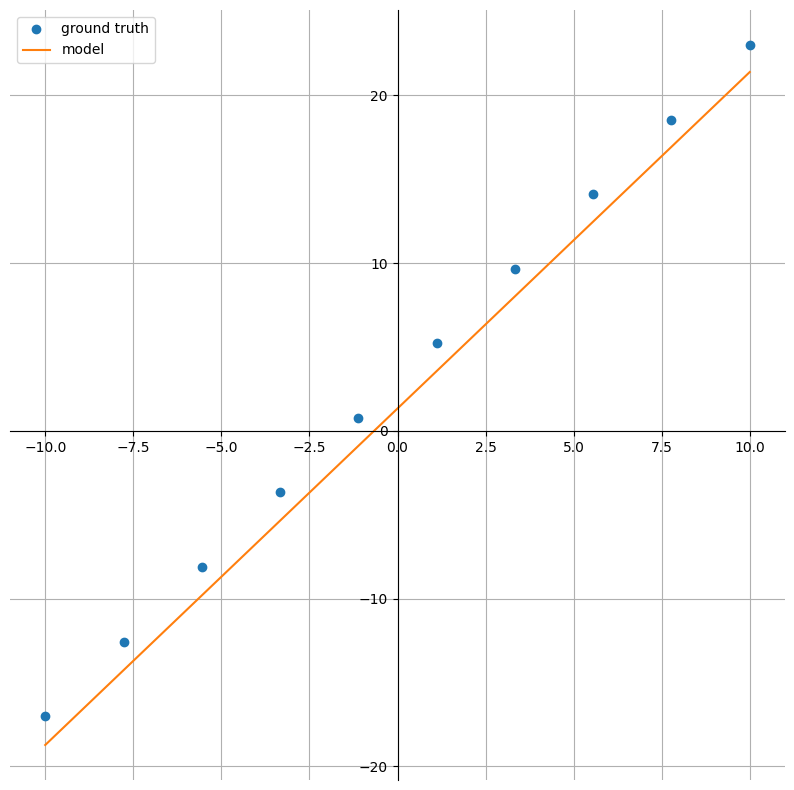

Epoch: 30; Train Loss: 2.6806392669677734


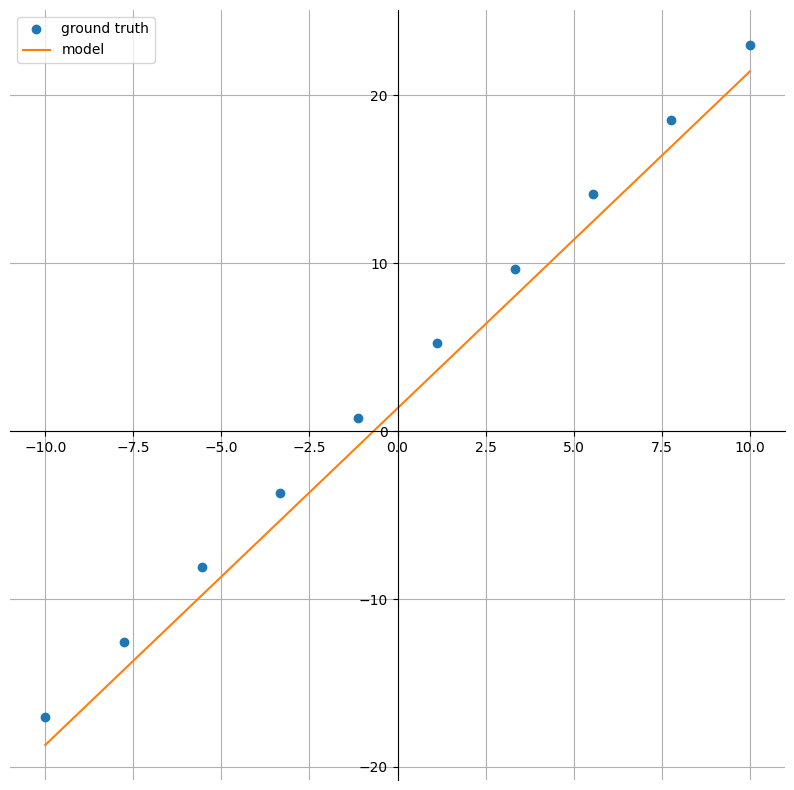

Epoch: 40; Train Loss: 2.5754683017730713


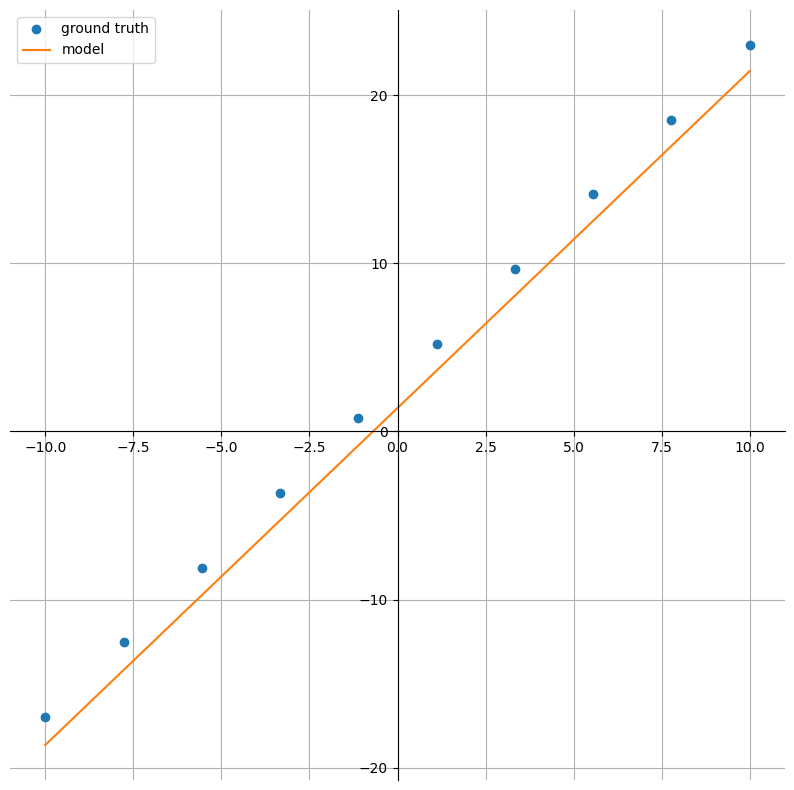

Epoch: 50; Train Loss: 2.4744224548339844


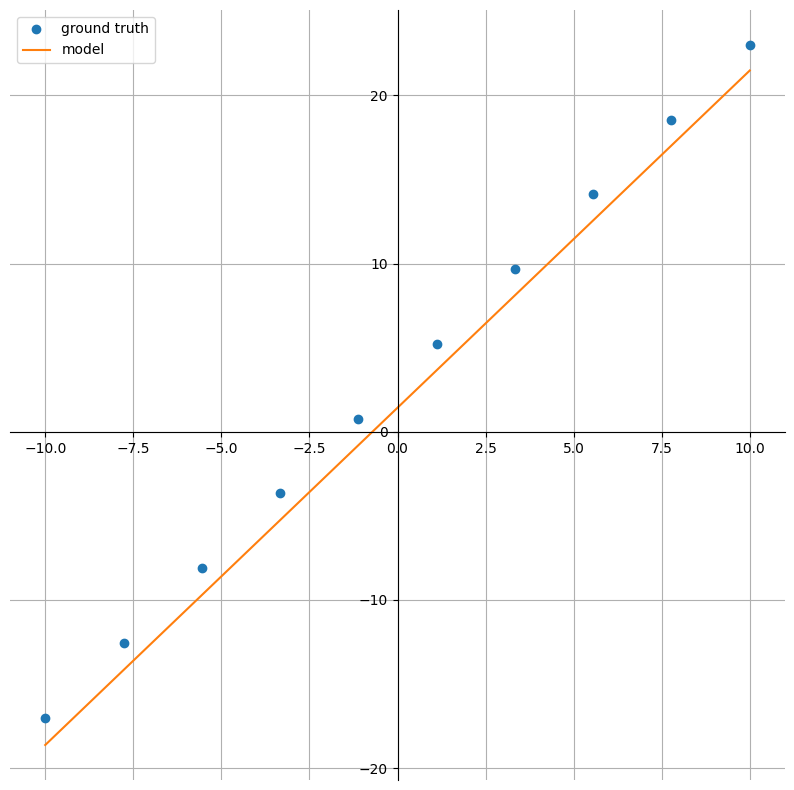

Epoch: 60; Train Loss: 2.377340793609619


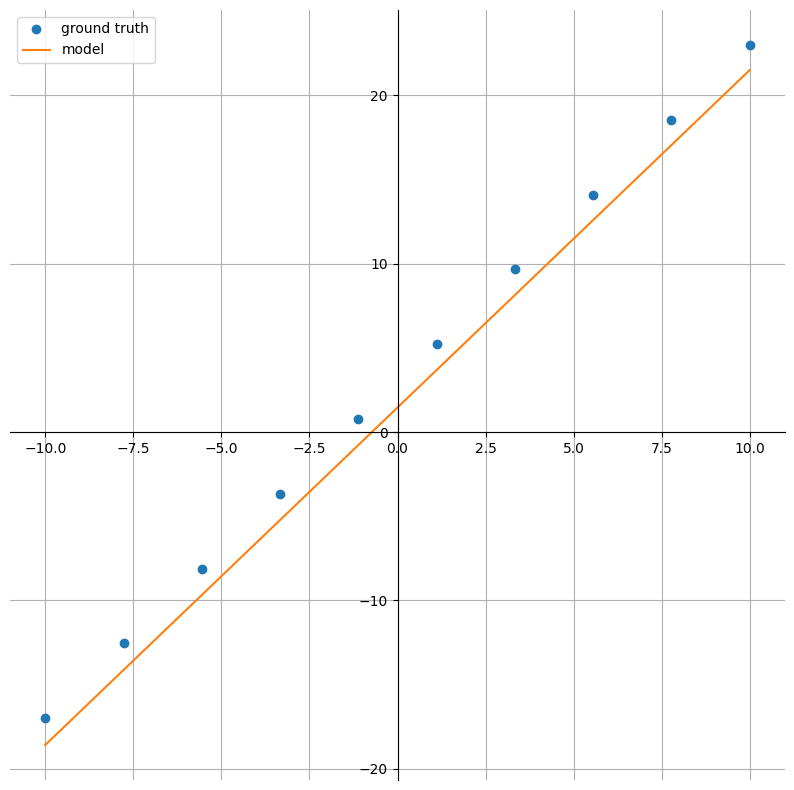

Epoch: 70; Train Loss: 2.284069776535034


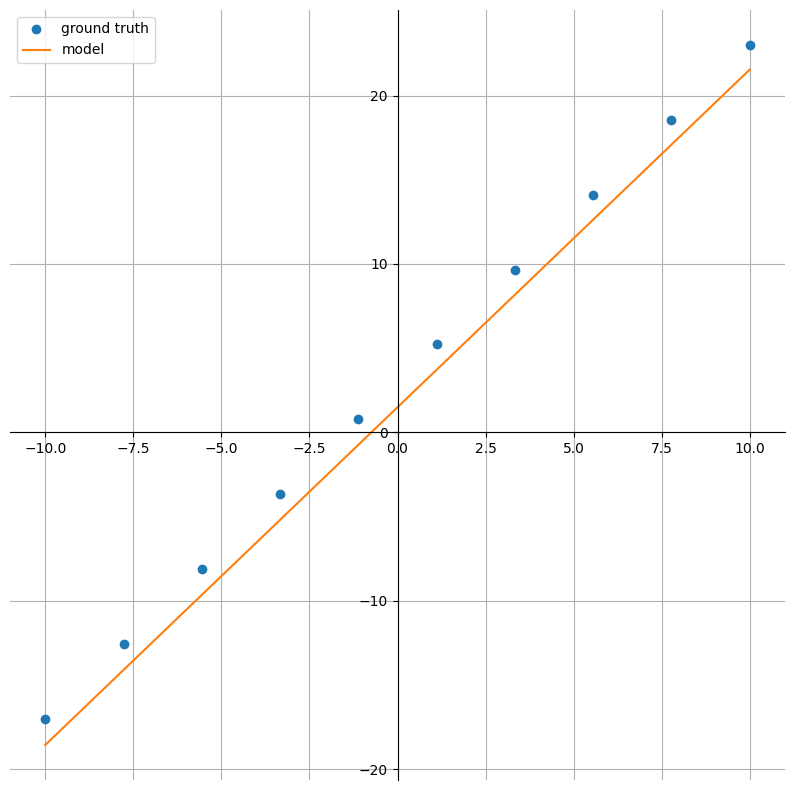

Epoch: 80; Train Loss: 2.1944570541381836


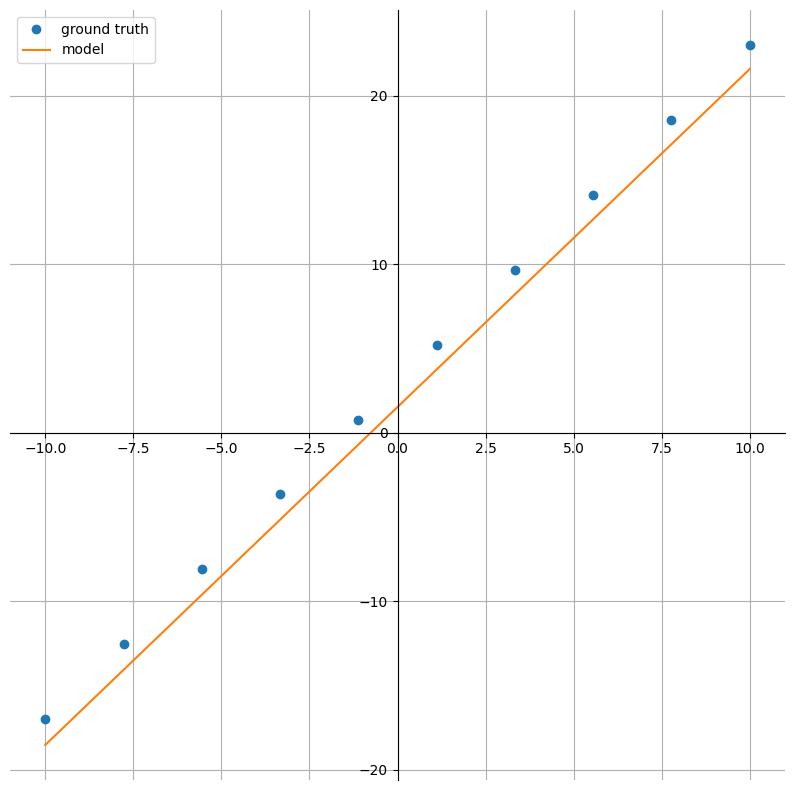

Epoch: 90; Train Loss: 2.1083595752716064


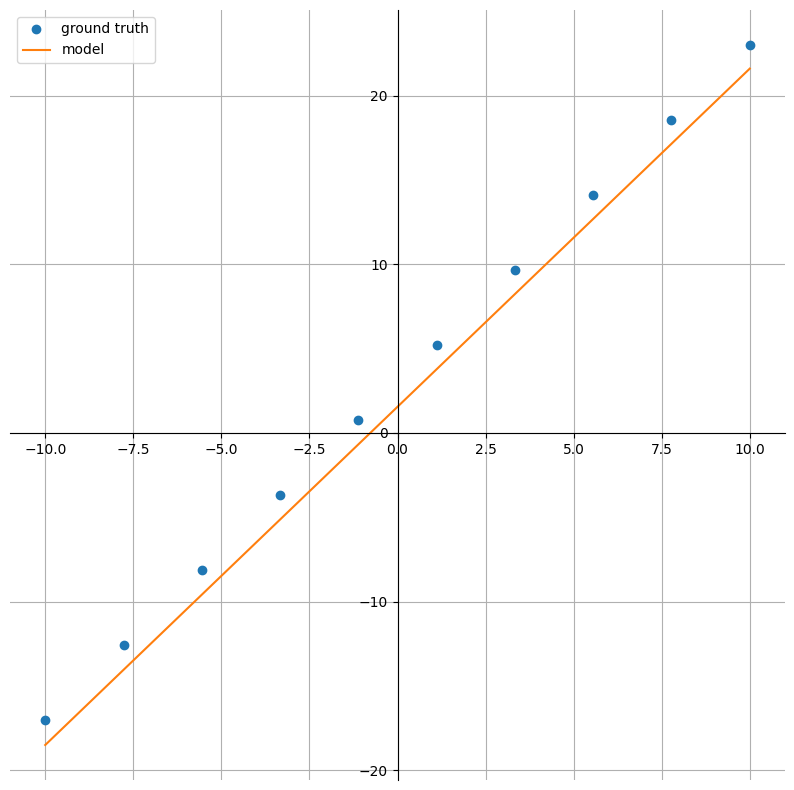

Epoch: 100; Train Loss: 2.0256407260894775


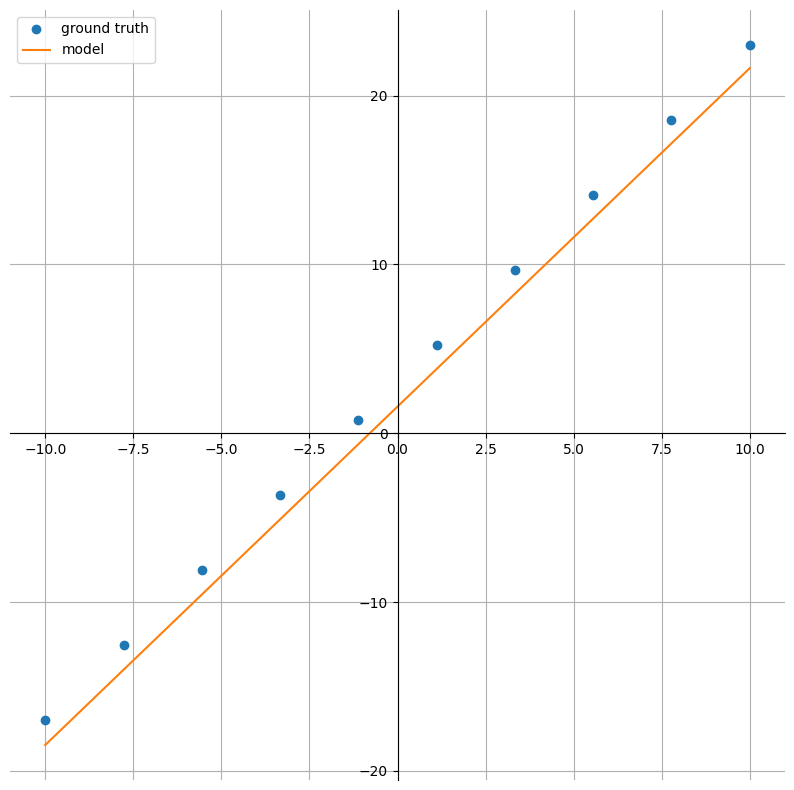

Epoch: 110; Train Loss: 1.9461679458618164


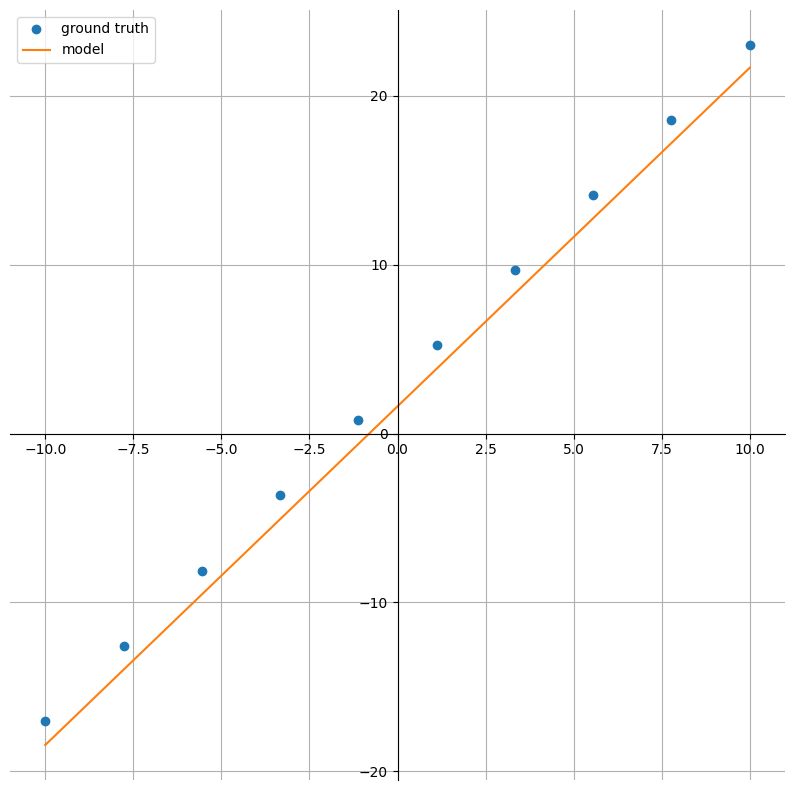

Epoch: 120; Train Loss: 1.8698123693466187


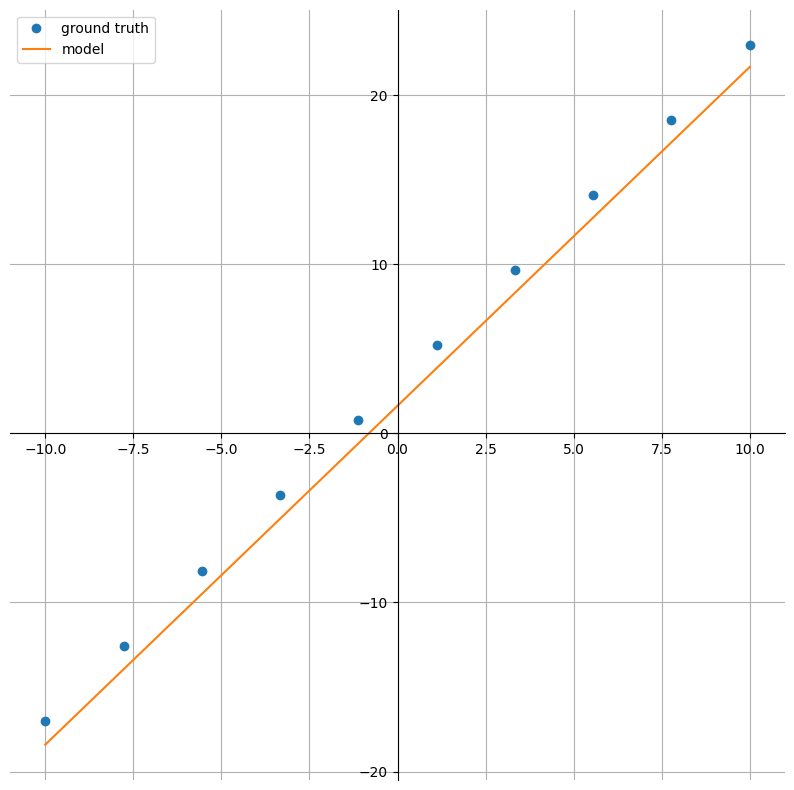

Epoch: 130; Train Loss: 1.7964526414871216


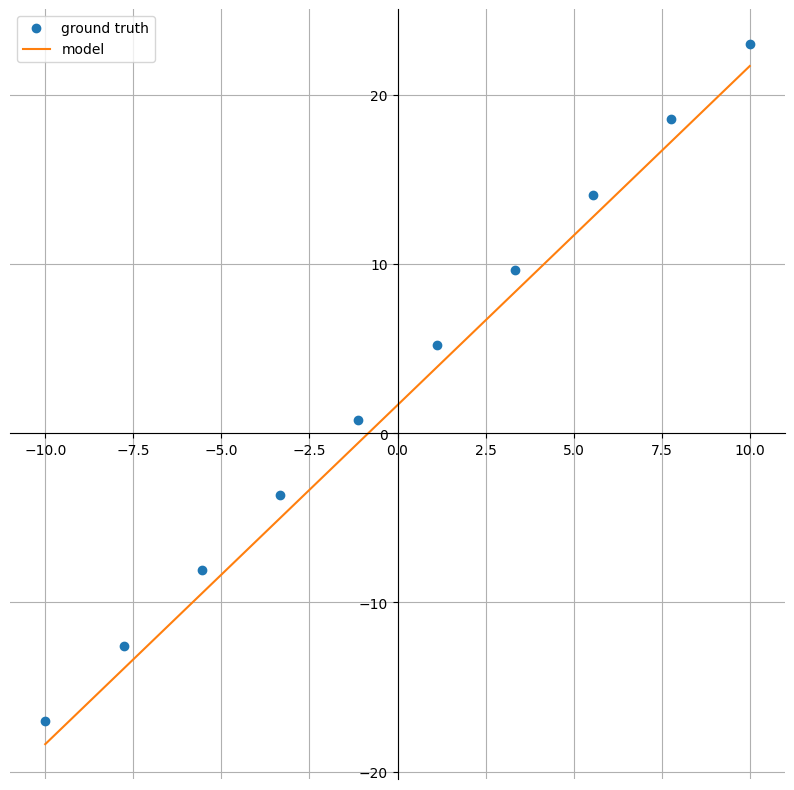

Epoch: 140; Train Loss: 1.7259716987609863


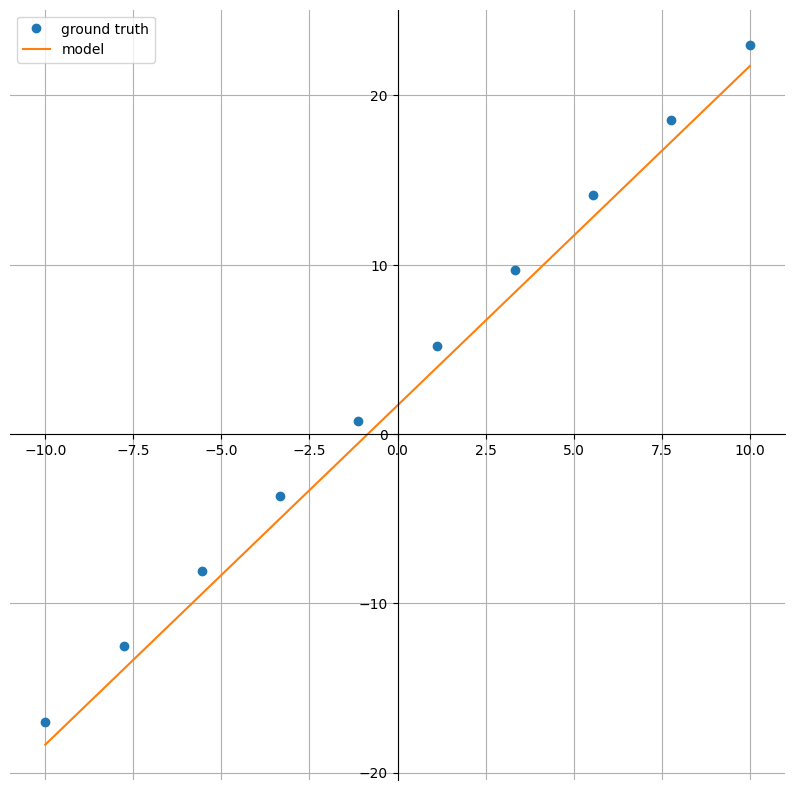

Epoch: 150; Train Loss: 1.6582547426223755


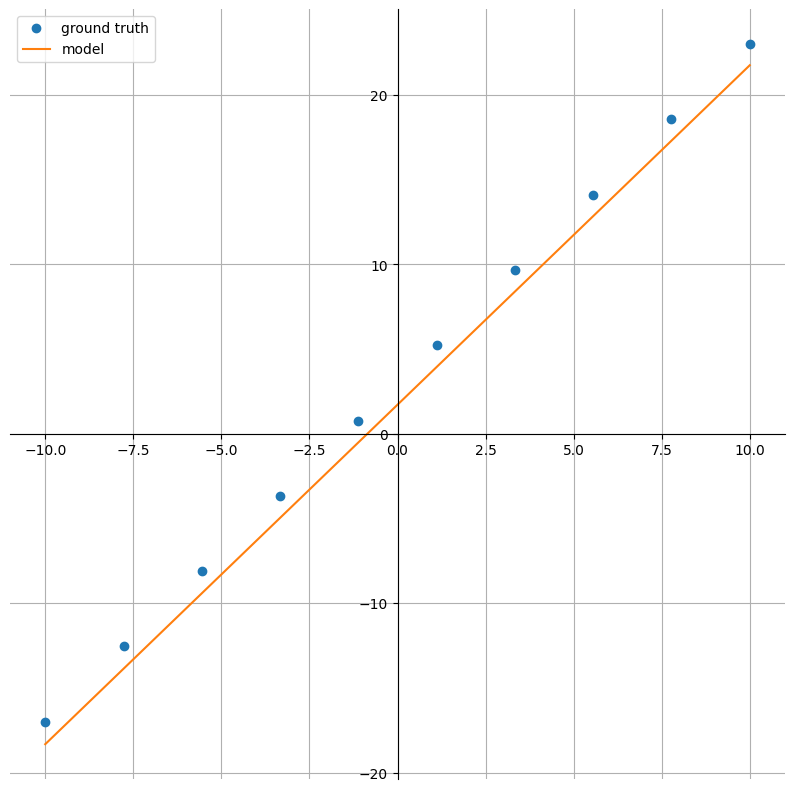

Epoch: 160; Train Loss: 1.5931957960128784


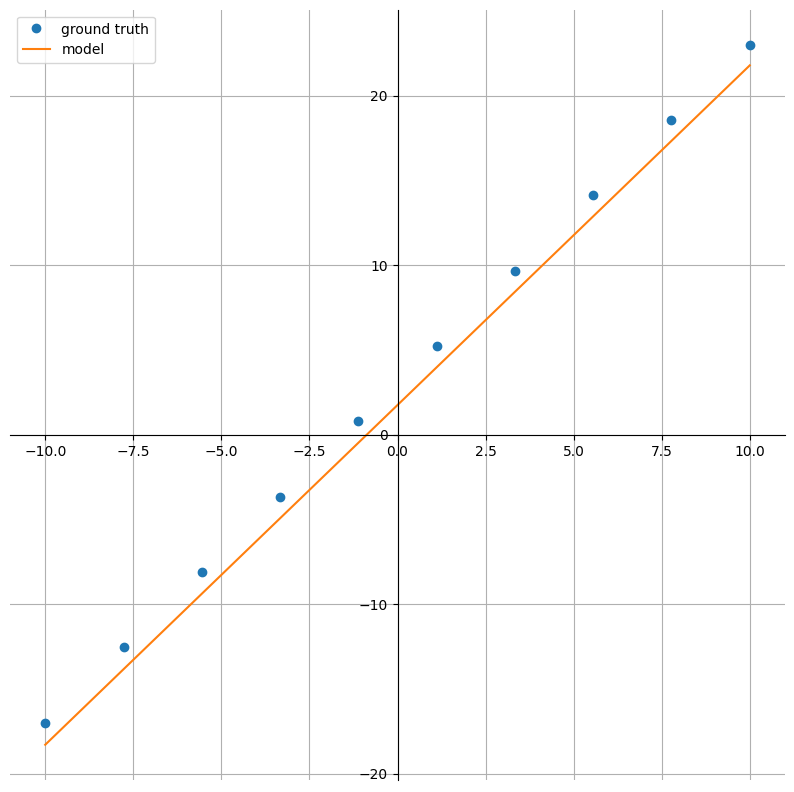

Epoch: 170; Train Loss: 1.5306891202926636


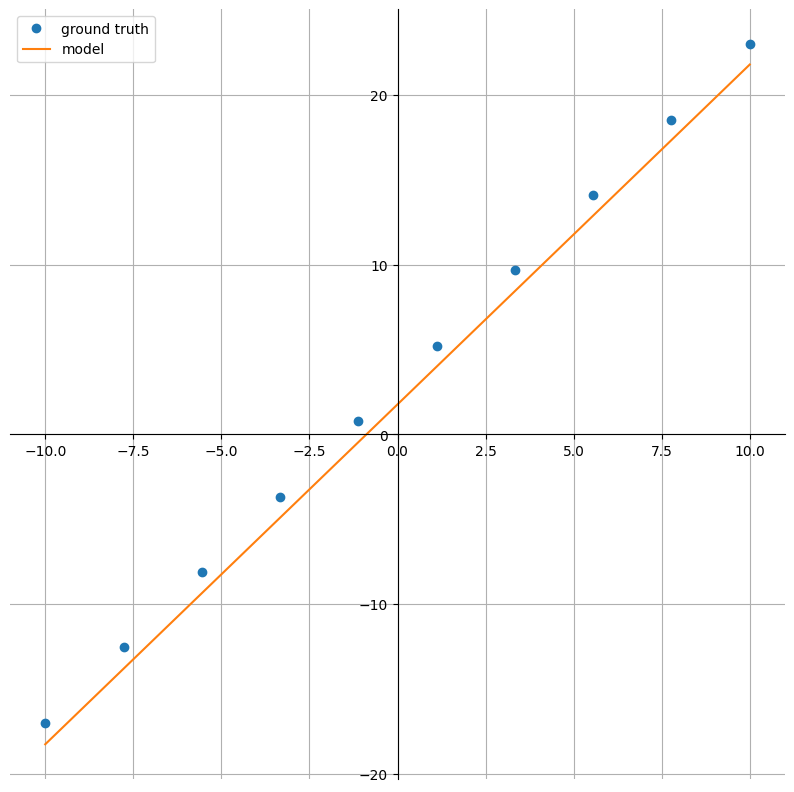

Epoch: 180; Train Loss: 1.47063410282135


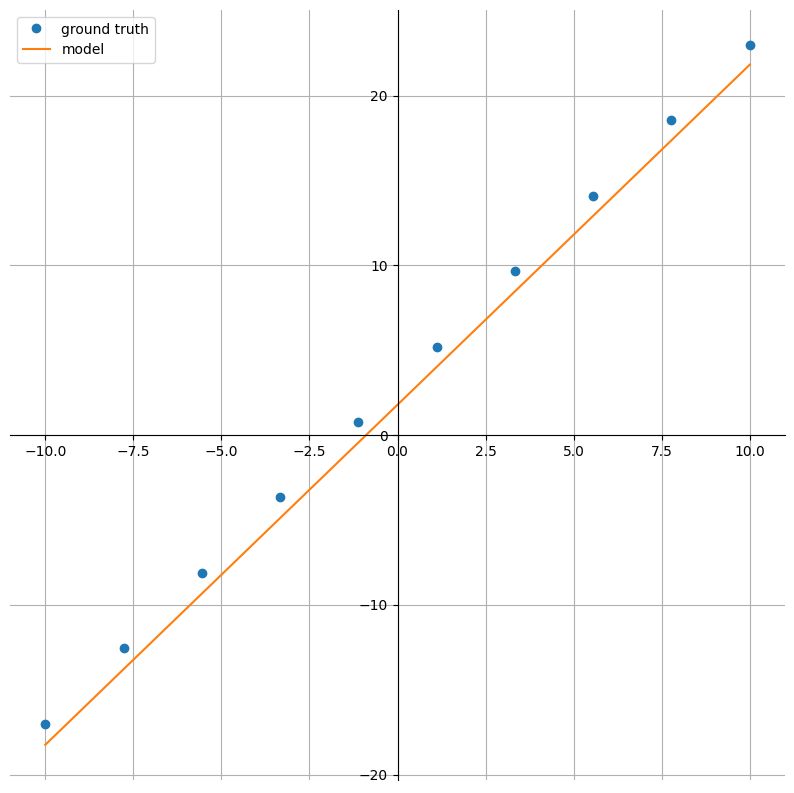

Epoch: 190; Train Loss: 1.4129362106323242


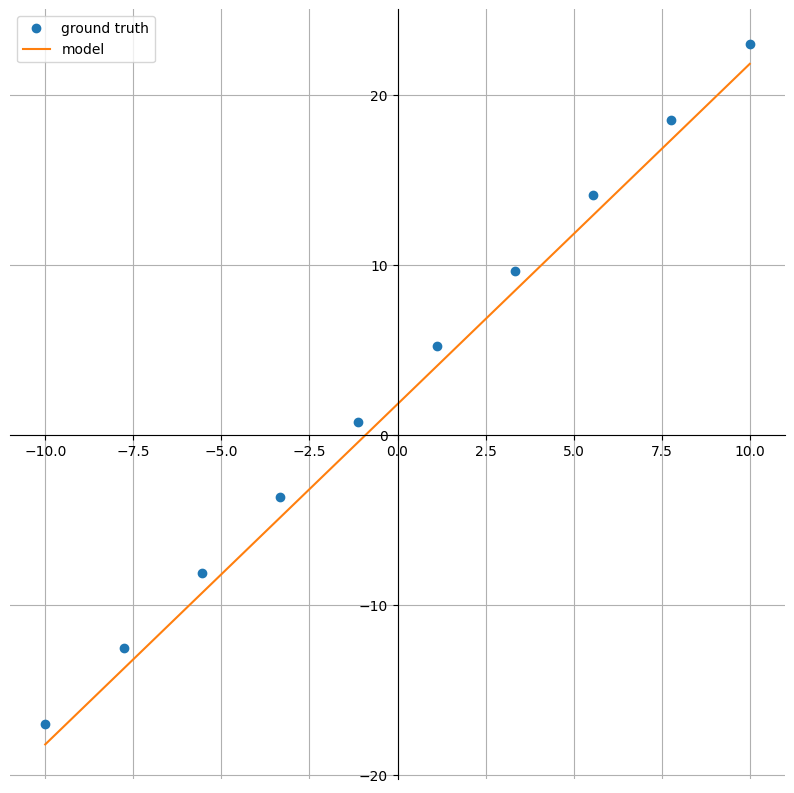

Epoch: 200; Train Loss: 1.3575010299682617


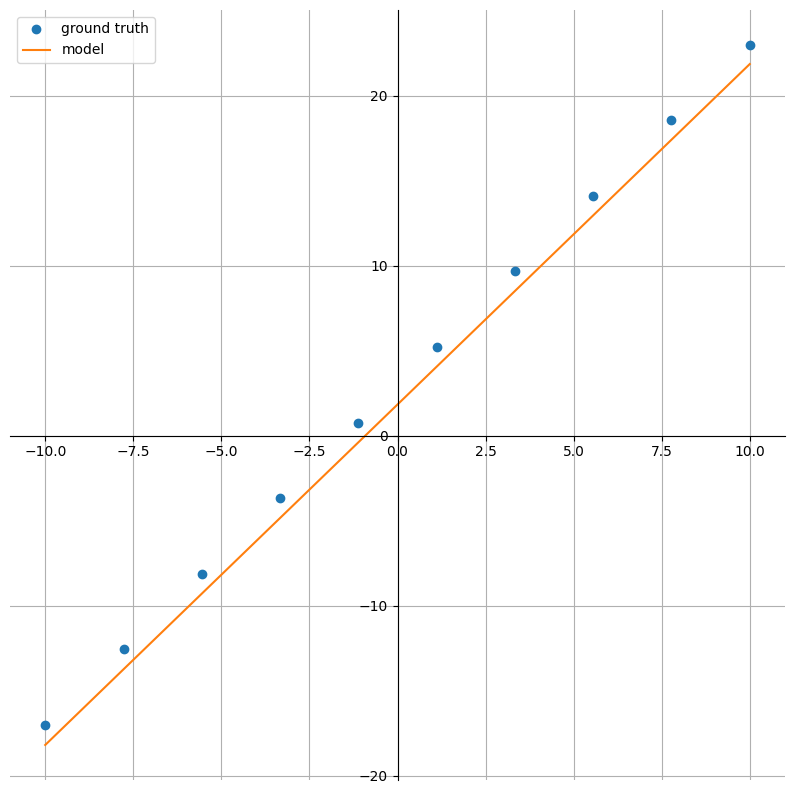

Epoch: 210; Train Loss: 1.3042411804199219


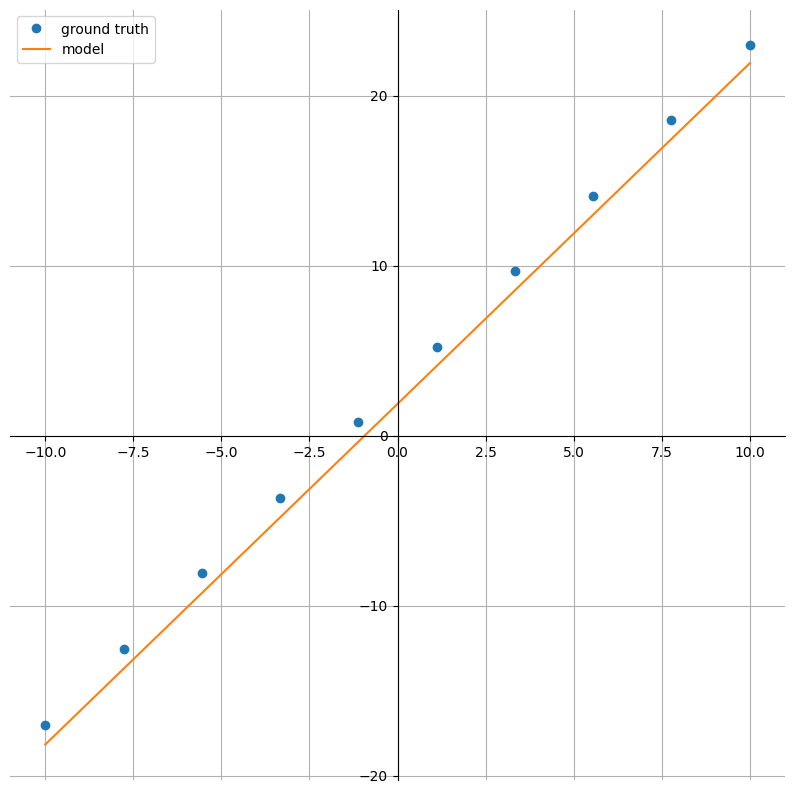

Epoch: 220; Train Loss: 1.2530710697174072


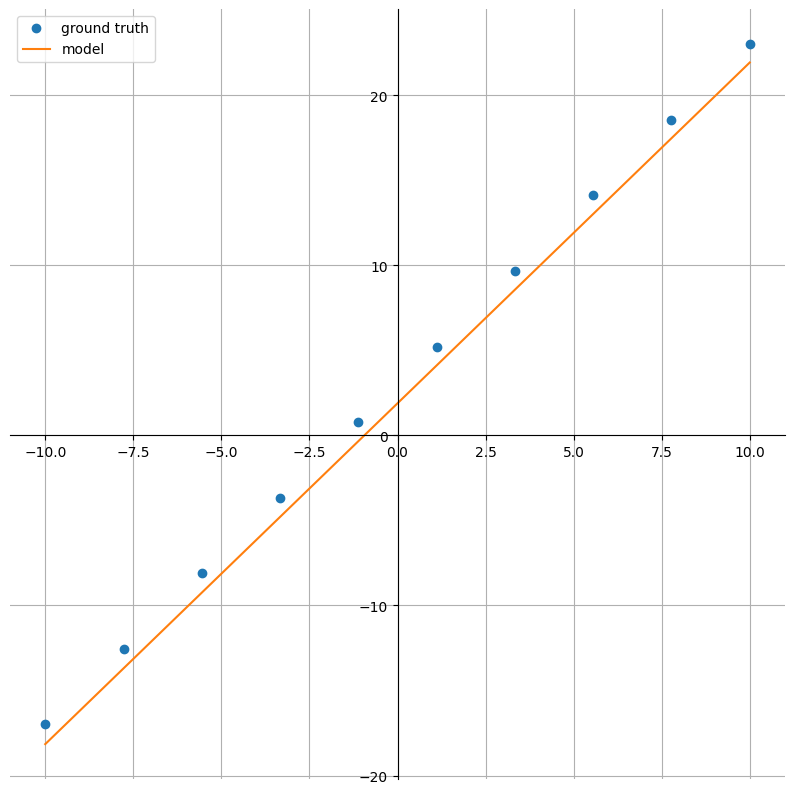

Epoch: 230; Train Loss: 1.2039079666137695


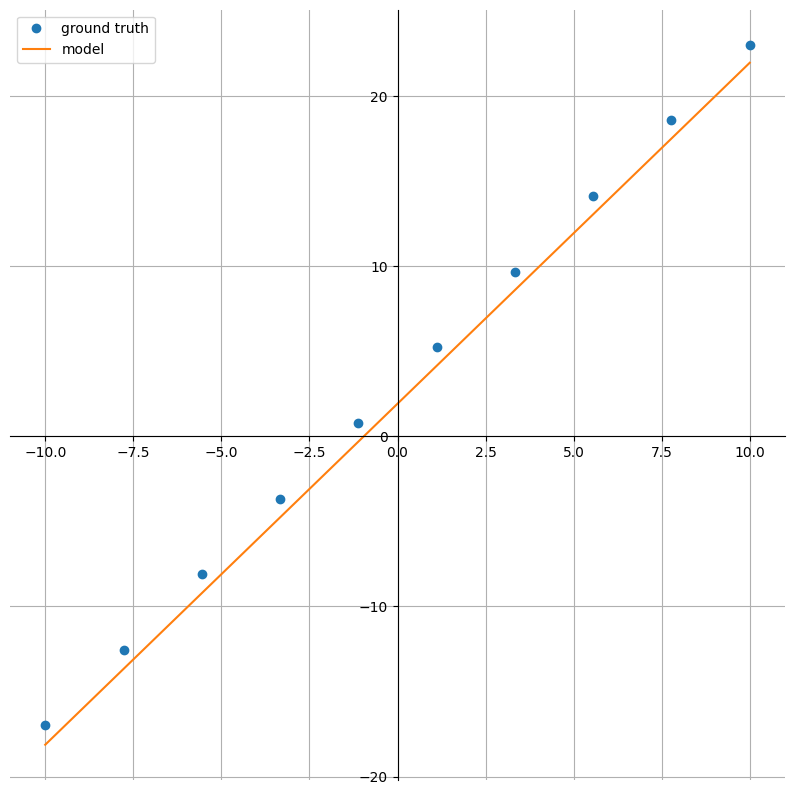

Epoch: 240; Train Loss: 1.1566742658615112


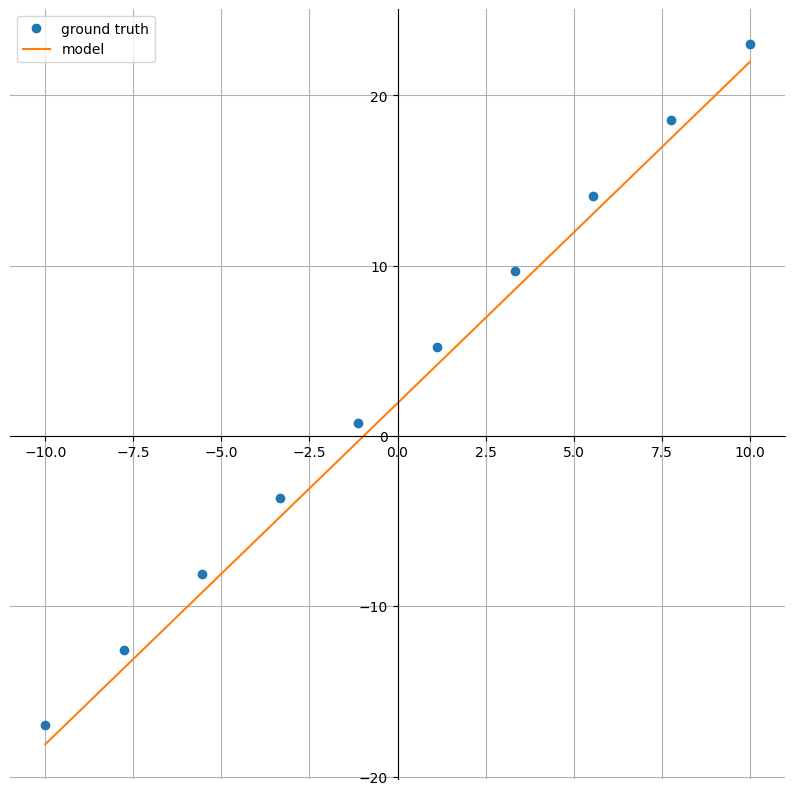

Epoch: 250; Train Loss: 1.1112936735153198


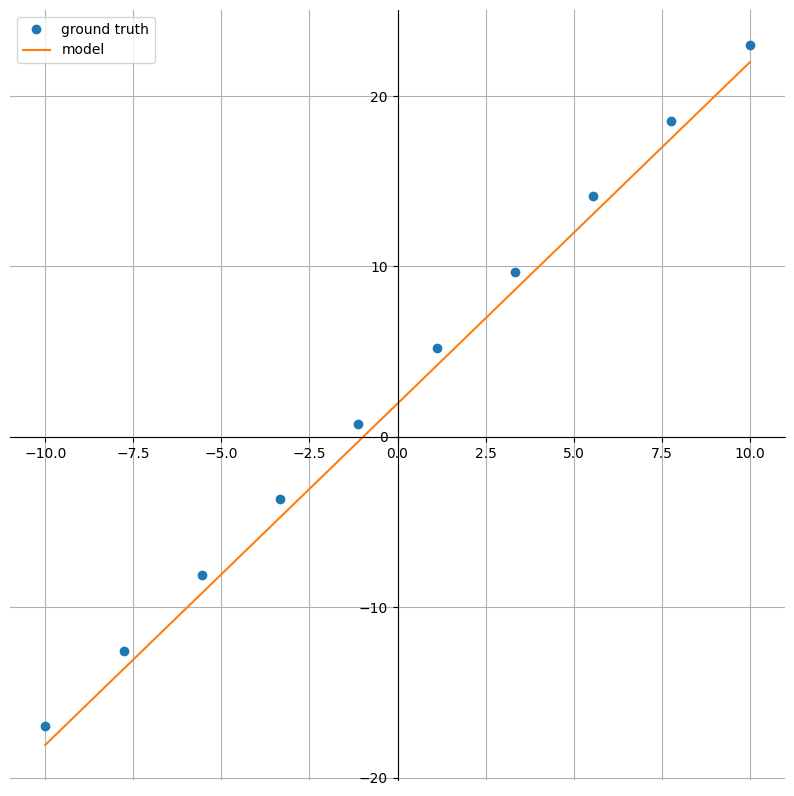

Epoch: 260; Train Loss: 1.067692756652832


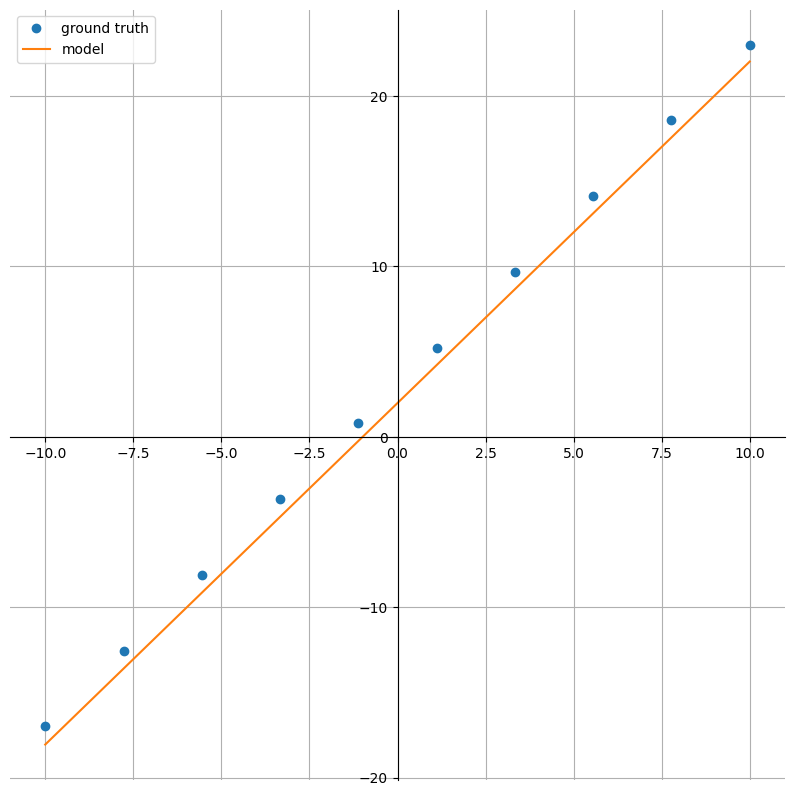

Epoch: 270; Train Loss: 1.0258036851882935


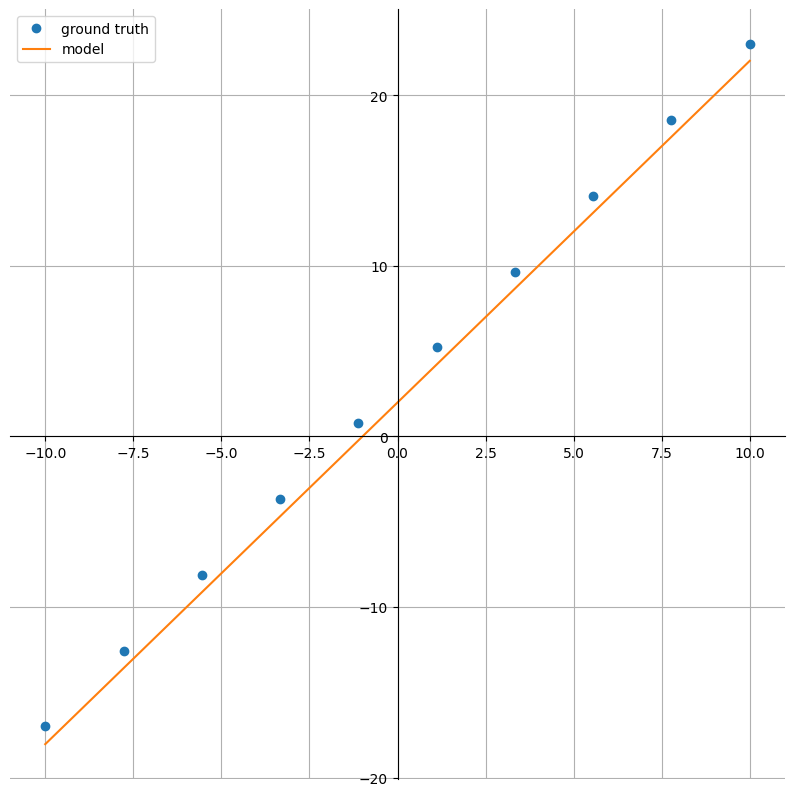

Epoch: 280; Train Loss: 0.9855576157569885


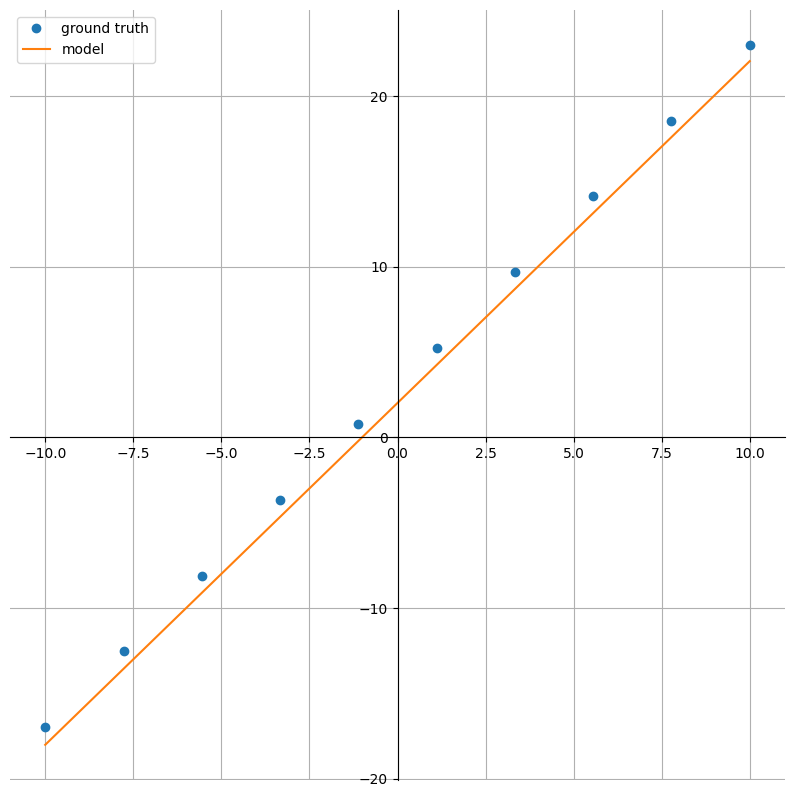

Epoch: 290; Train Loss: 0.9468905925750732


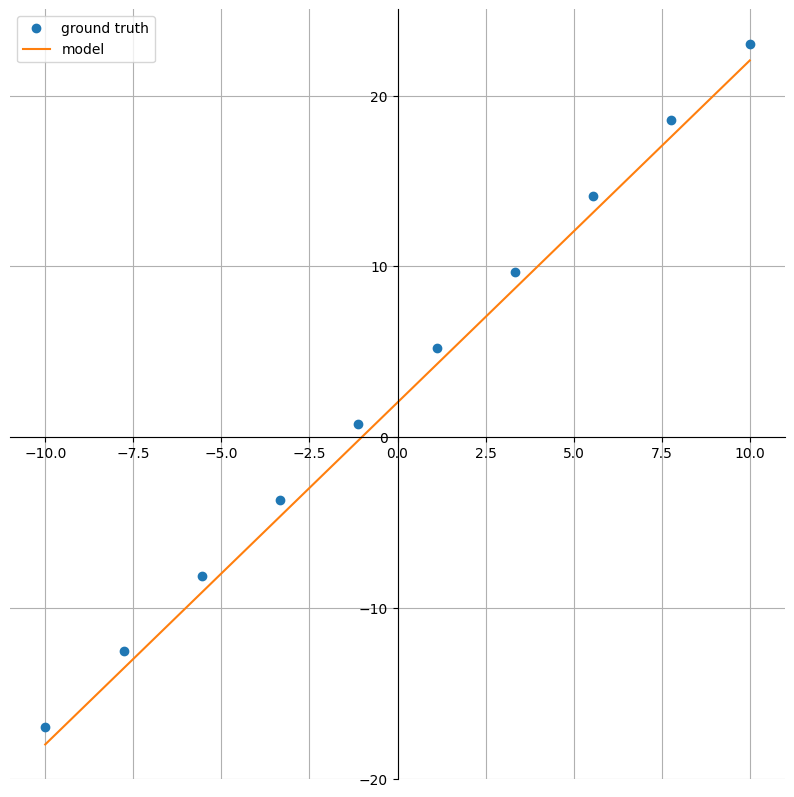

Epoch: 300; Train Loss: 0.9097400307655334


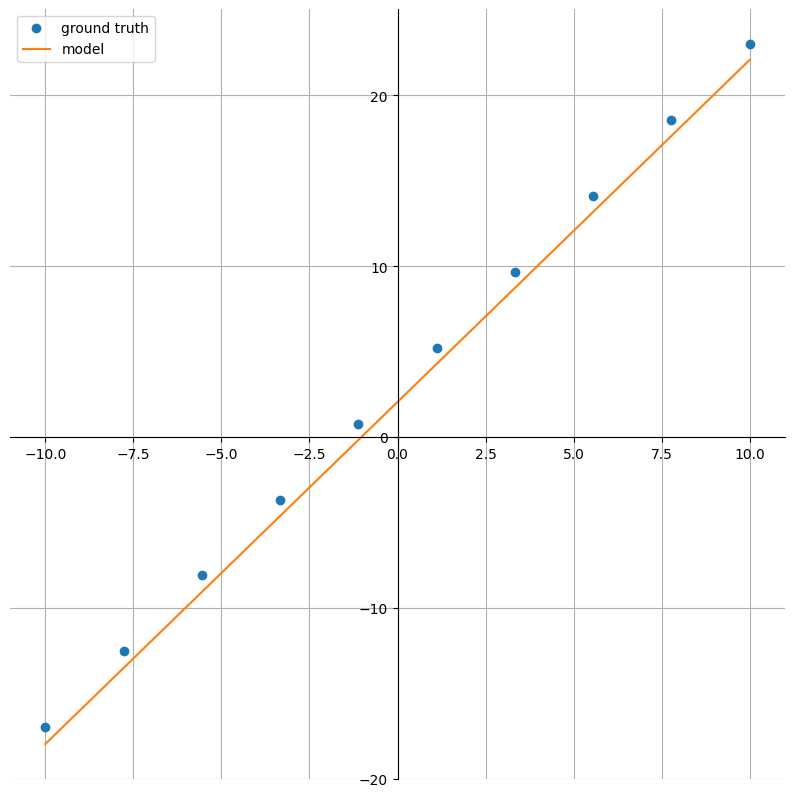

Test Loss: 0.9080707430839539


In [85]:
#epochs serve para dizer quantas vezes irá rodar o treinamento
epochs = 301
for t in range(epochs):
  train_loss = train(model, train_dataloader, lossfunc, optimizer)
  if t % 10 == 0:
    print(f"Epoch: {t}; Train Loss: {train_loss}")
    plot_comparinson(line, model)

test_loss = test(model, test_dataloader, lossfunc)
print(f"Test Loss: {test_loss}")